In [ ]:
"""
Authors: Grant Dawson and Ryan Rosiak
Link to the dataset!
https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior

Attributes:
ID - numeric - Quantitative
Income - numeric - Quantitative
Age - numeric - Quantitative
Experience - 
Marrital Status - String - Catagroical - Single/Married
House_Ownership - String - Catagroical - Rented/Owned
Car_Ownership - String - Catagroical - yes/no
Profession - String - Job
City - String - City
State - String - State
Current_Job_Yrs - numeric - Quantitiative
Current_House_Yrs - numeric - Quantitative
(OPTIONAL) Risk_Flag - String - Qualitative - This is given and says 
if the person is a risk for giving a loan
    (Test data has it's risk numbers in SamplePredictionDataset.csv)
"""

In [21]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import matplotlib.pyplot as plt

## Loading the data

In [5]:
def load_data():
    return pd.read_csv("Dataset/TrainingData.csv"), pd.read_csv("Dataset/TestData.csv")

In [6]:
trainData, testData = load_data()

In [7]:
trainData.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
testData.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


## Looking into the data

In [9]:
#Make sure the sizes match the csv files
print("Test data size: ", len(testData))
print("Train data size: ", len(trainData))

Test data size:  28000
Train data size:  252000


In [10]:
trainData.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [11]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [12]:
#Calculating means
for i in testData.columns:
    print(f"The mean of {i}: {round(pd.to_numeric(testData[i], errors='coerce').mean(),2)}")
    


The mean of ID: 14000.5
The mean of Income: 5029562.65
The mean of Age: 50.05
The mean of Experience: 10.12
The mean of Married/Single: nan
The mean of House_Ownership: nan
The mean of Car_Ownership: nan
The mean of Profession: nan
The mean of CITY: nan
The mean of STATE: nan
The mean of CURRENT_JOB_YRS: 6.34
The mean of CURRENT_HOUSE_YRS: 11.99


In [13]:
#Count unique entries
for i in testData.columns:
    print(f"There are {len(set(testData[i]))} unique enterencies for {i}")

There are 28000 unique enterencies for ID
There are 9916 unique enterencies for Income
There are 59 unique enterencies for Age
There are 21 unique enterencies for Experience
There are 2 unique enterencies for Married/Single
There are 3 unique enterencies for House_Ownership
There are 2 unique enterencies for Car_Ownership
There are 51 unique enterencies for Profession
There are 317 unique enterencies for CITY
There are 29 unique enterencies for STATE
There are 15 unique enterencies for CURRENT_JOB_YRS
There are 5 unique enterencies for CURRENT_HOUSE_YRS


In [14]:
for i in testData.columns:
    if i == "ID" or i == "Income" or i =="CITY":
        continue
    print(f"{i}:{set(testData[i])}")

Age:{21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}
Experience:{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
Married/Single:{'single', 'married'}
House_Ownership:{'rented', 'owned', 'norent_noown'}
Car_Ownership:{'no', 'yes'}
Profession:{'Architect', 'Civil servant', 'Technician', 'Librarian', 'Technology specialist', 'Consultant', 'Financial Analyst', 'Mechanical engineer', 'Designer', 'Graphic Designer', 'Computer operator', 'Politician', 'Statistician', 'Geologist', 'Magistrate', 'Army officer', 'Surgeon', 'Surveyor', 'Chartered Accountant', 'Flight attendant', 'Microbiologist', 'Air traffic controller', 'Industrial Engineer', 'Computer hardware engineer', 'Dentist', 'Biomedical Engineer', 'Lawyer', 'Technical writer', 'Software Developer', 'Aviator', 'Analyst', 'Engin

## Visualizing the data


In [15]:
lp_dataframe = trainData

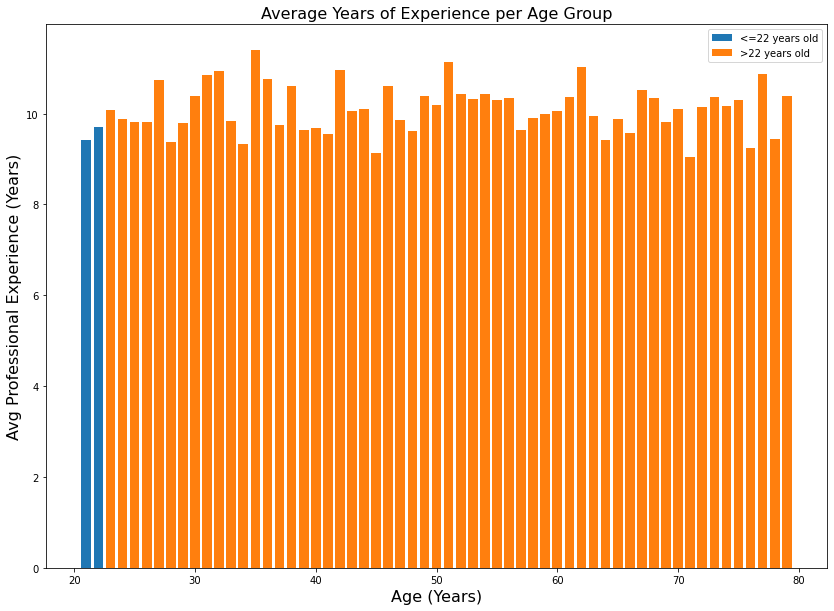

In [26]:
sub_data_lp = lp_dataframe[['Age', 'Experience']]
result_cond_young = sub_data_lp.loc[sub_data_lp['Age'] <= 22].groupby(by='Age').mean()
result_cond_old = sub_data_lp.loc[sub_data_lp['Age'] > 22].groupby(by='Age').mean()
x_axis1 = result_cond_young.reset_index()['Age']
y_axis1 = result_cond_young.reset_index()['Experience']
x_axis2 = result_cond_old.reset_index()['Age']
y_axis2 = result_cond_old.reset_index()['Experience']
plt.figure(figsize=(14,10))
plt.bar(x_axis1, y_axis1)
plt.bar(x_axis2, y_axis2)
plt.title('Average Years of Experience per Age Group', fontsize=16)
plt.xlabel('Age (Years)', fontsize=16)
plt.ylabel('Avg Professional Experience (Years)', fontsize=16)
plt.legend(['<=22 years old', '>22 years old'])
plt.show()

In [17]:
sub_data_lp = lp_dataframe[['Income', 'Profession']]
max_income_professions = sub_data_lp.groupby(by='Profession').max().sort_values(by='Income', ascending=False)
print('Top 10 Highest Paid Professions (Max)')
print(max_income_professions[:10])
mean_income_professions = sub_data_lp.groupby(by='Profession').mean().sort_values(by='Income', ascending=False)
print('\nTop 10 Highest Paid Professions (Avg)')
print(mean_income_professions[:10])

Top 10 Highest Paid Professions (Max)
                             Income
Profession                         
Police_officer              9999938
Librarian                   9999400
Drafter                     9999180
Aviator                     9998280
Secretary                   9998070
Designer                    9996946
Statistician                9996861
Computer_hardware_engineer  9996192
Surgeon                     9995445
Biomedical_Engineer         9994932

Top 10 Highest Paid Professions (Avg)
                           Income
Profession                       
Petroleum_Engineer   5.443310e+06
Psychologist         5.357795e+06
Designer             5.336802e+06
Scientist            5.282710e+06
Surgeon              5.235359e+06
Comedian             5.199539e+06
Chemical_engineer    5.189805e+06
Mechanical_engineer  5.175032e+06
Artist               5.164765e+06
Financial_Analyst    5.145753e+06


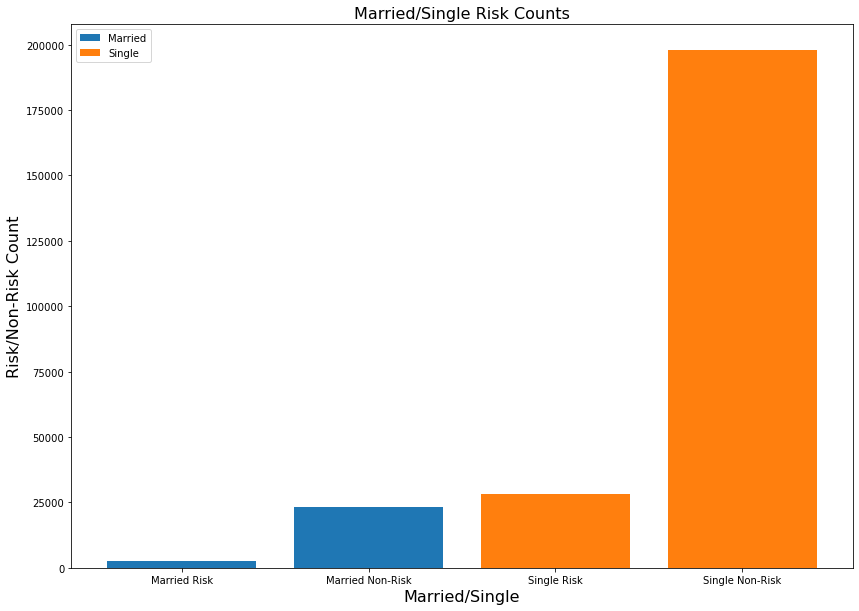

In [25]:
list_data = lp_dataframe[['Married/Single', 'Risk_Flag']]
result1 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 1)].count()
result2 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 0)].count()
result3 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 1)].count()
result4 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 0)].count()
plt.figure(figsize=(14,10))
plt.bar(['Married Risk', 'Married Non-Risk'],
        [result1[0], result2[0]])
plt.bar(['Single Risk', 'Single Non-Risk'],
       [result3[0], result4[0]])
plt.title('Married/Single Risk Counts', fontsize=16)
plt.ylabel('Risk/Non-Risk Count', fontsize=16)
plt.xlabel('Married/Single', fontsize=16)
plt.legend(['Married', 'Single'])
plt.show()

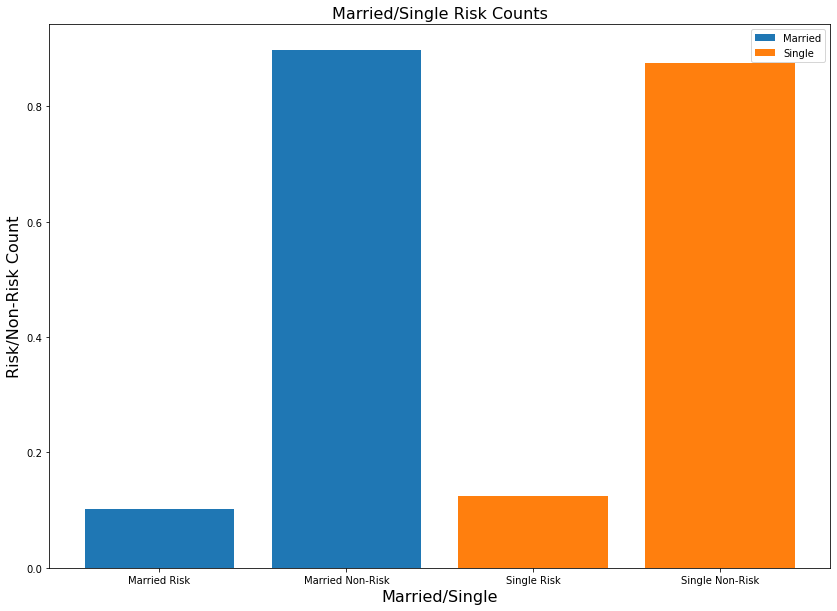

In [24]:
list_data = lp_dataframe[['Married/Single', 'Risk_Flag']]
result1 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 1)].count() / list_data.loc[(list_data['Married/Single'] == 'married')].count()
result2 = list_data.loc[(list_data['Married/Single'] == 'married') & (list_data['Risk_Flag'] == 0)].count() / list_data.loc[(list_data['Married/Single'] == 'married')].count()
result3 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 1)].count() / list_data.loc[(list_data['Married/Single'] == 'single')].count()
result4 = list_data.loc[(list_data['Married/Single'] == 'single') & (list_data['Risk_Flag'] == 0)].count() / list_data.loc[(list_data['Married/Single'] == 'single')].count()
plt.figure(figsize=(14,10))
plt.bar(['Married Risk', 'Married Non-Risk'],
        [result1[0], result2[0]])
plt.bar(['Single Risk', 'Single Non-Risk'],
       [result3[0], result4[0]])
plt.title('Married/Single Risk Counts', fontsize=16)
plt.ylabel('Risk/Non-Risk Count', fontsize=16)
plt.xlabel('Married/Single', fontsize=16)
plt.legend(['Married', 'Single'])
plt.show()